## ARIMA model
Best for time series,
AR- AutoRegressive dependent relationship between observation and some lagged observations(p) I- Integrated used for differencing raw observation/. subtracting one observations from another from previous timestamps to make time series stationary(d) MA- Moving Average dependency between an observation and residual erros from a moving average model applied to lagged observations It takes account in past values to predict future values

What does lagged mean in time series? Lagging a time series means to shift its values forward one or more time steps, or equivalently, to shift the times in its index backward one or more steps.

In [702]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [703]:
data=pd.read_excel('../DATA/AAPLStocks.xlsx')
data.drop('Unnamed: 0', axis=1, inplace=True)
data['date']= pd.to_datetime(data[['Year', 'month','day']])
data.set_index('date', inplace=True)
data.drop(['Year', 'month','day'], axis=1,inplace=True)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
1998-01-26,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0
1998-01-27,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0
1998-01-28,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0
1998-01-29,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0
1998-01-30,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0
...,...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0
2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0
2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0


### Since we want to predict the price we should only select the close column and create new dataframe

In [704]:
df=data[data['Close']>78].copy()

In [705]:
df=df[['Close']].copy()

In [706]:
df

,Close
date,
2020-01-17,78.063148
2020-01-23,78.185600
2020-01-29,79.437141
2020-01-30,79.322037
2020-02-04,78.092545
...,...
2023-01-19,135.270004
2023-01-20,137.869995
2023-01-23,141.110001


In [707]:
df.describe()

,Close
count,690.000000
mean,136.423541
std,23.853746
min,78.063148
25%,122.704903
50%,139.912956
75%,151.498642
max,180.959732


<AxesSubplot:xlabel='date'>

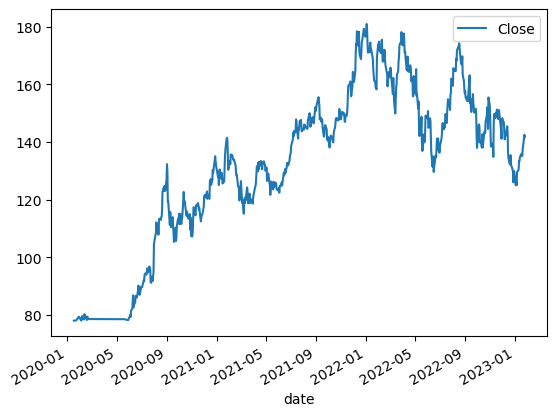

In [708]:
df.plot()

### Stationary Time Series

A stationary time series has statistical properties or moments (e.g., mean and variance) that do not vary in time. 

# We can see how time series can be stationary by ADF test
# Adf tries to prove null hypotheis wrong
### null hypothesis: not stationary (p-value>0.05)
### alternate hypothesis:stationary
### pvalue>0.05 we need to find order of differencing

In [709]:
from statsmodels.tsa.stattools import adfuller
result= adfuller(df['Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -2.508188419541179
p-value: 0.11349468487812037


Since p-value is more than 0.05 we can infer its not stationary and we need to find the order ofdifferencing

### order of differencing
d=0 if its stationary

## AR Term (p)- We find from PACF plot

In [710]:

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


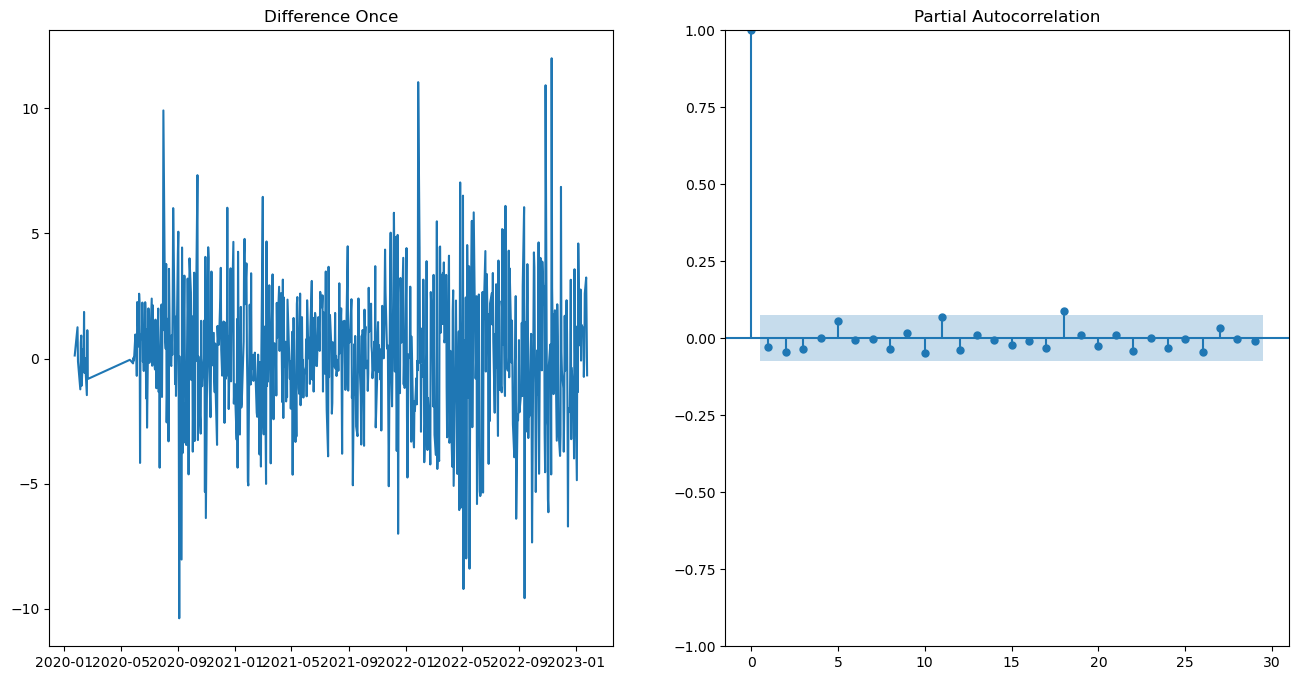

In [739]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Once')
plot_pacf(diff,ax=ax2);
plt.savefig('pacf.png')

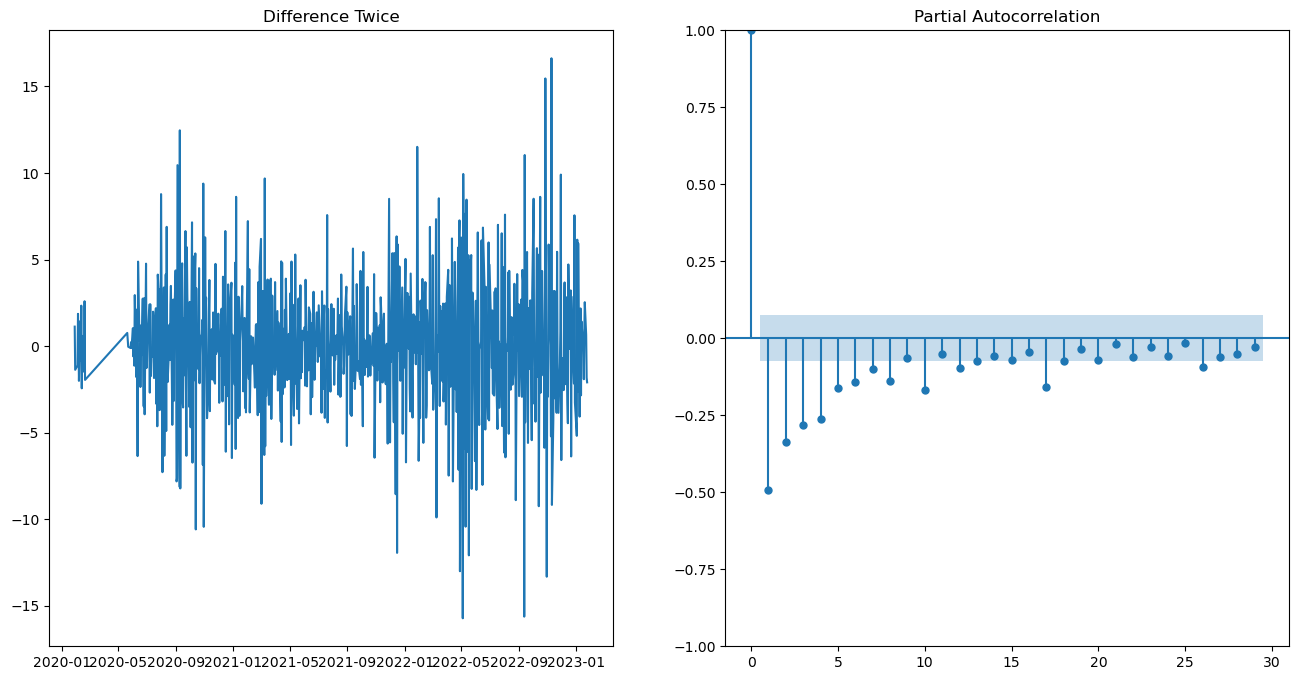

In [712]:
diff=df.Close.diff().diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Twice')
plot_pacf(diff,ax=ax2);

the lag in 2nd plt shows that second lag has gone more to neagtive which indicates that it migh have overdifference so we use 1. (p=1)

## Finding d from statsmodel

In [713]:
from pmdarima.arima.utils import ndiffs

In [714]:
ndiffs(df.Close,test='adf')

1

d=1
Also from the figure we saw that we can use d=1 because if we difference twice then lags in 1st is high

## MA Term (q)- We find from ACF plot

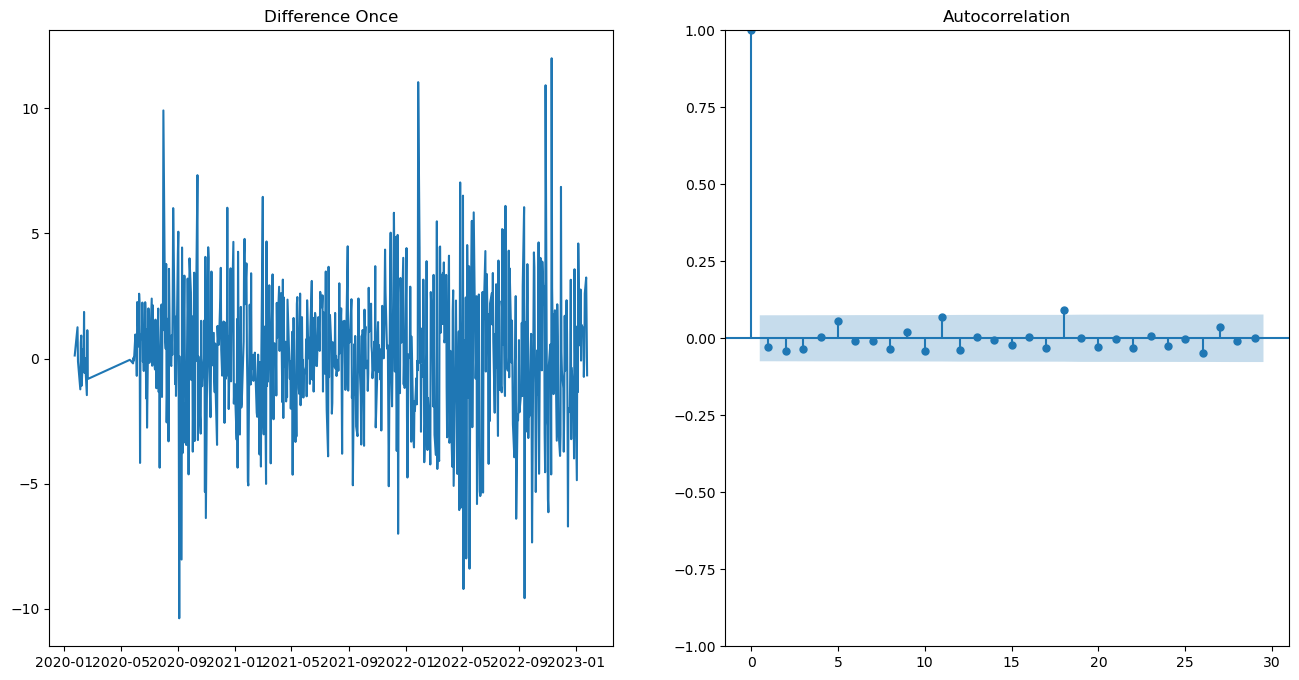

In [740]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);
plt.savefig('acf-1.png')

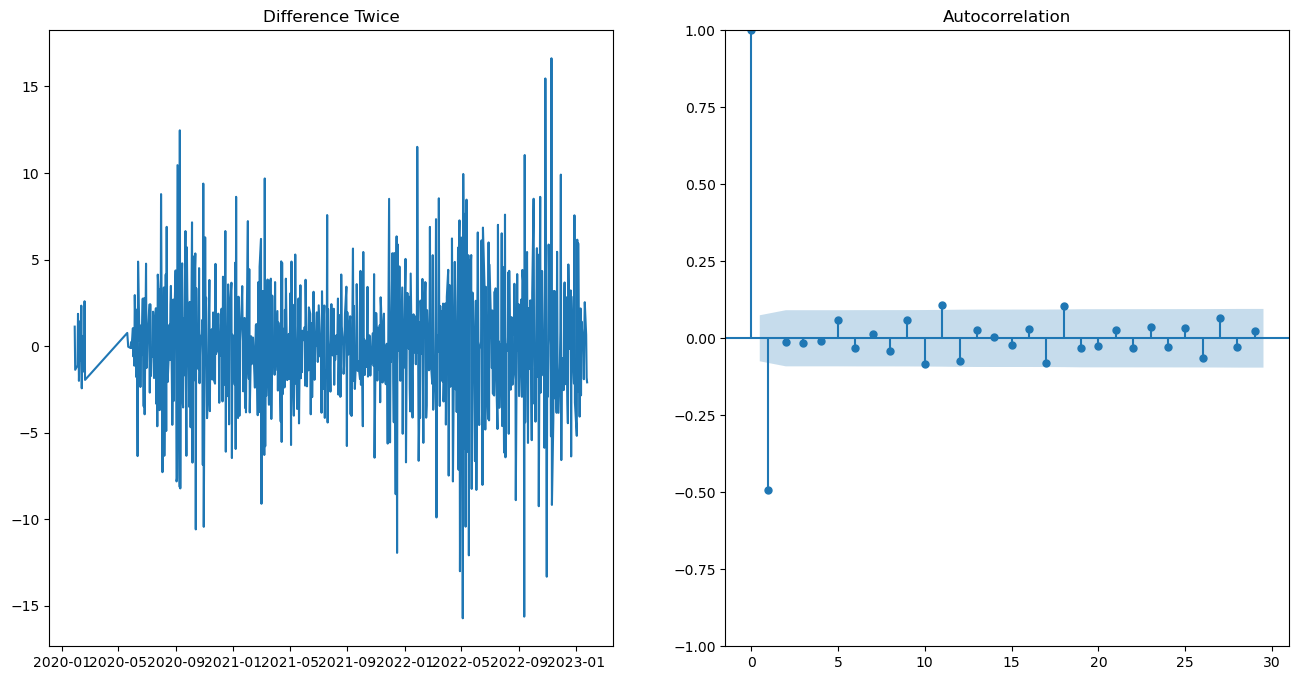

In [742]:
diff=df.Close.diff().diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Twice')
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);
plt.savefig('acf-2.png')

q=1 because it has gone to extreme negative

## Else you can find p,d,q using auto-arima

In [717]:

model = pm.auto_arima(df.Close,
                      start_p=1, start_q=1,
                      test='adf',       
                      max_p=5, max_q=5,
                      m=1,             
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3369.209, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3366.960, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3368.366, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3368.308, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3365.726, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.683 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  690
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1681.863
Date:                Thu, 16 Feb 2023   AIC                           3365.726
Time:                        18:27:43   BIC                           3370.261
Sample:                             0   HQIC                          3367.480
                                - 690                                       

## Fitting the model

In [718]:
model= ARIMA(df.Close,order=(0,1,0))
result= model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [719]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  690
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1681.863
Date:                Thu, 16 Feb 2023   AIC                           3365.726
Time:                        18:27:43   BIC                           3370.261
Sample:                             0   HQIC                          3367.480
                                - 690                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.7227      0.314     24.582      0.000       7.107       8.338
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                65.75
Prob(Q):                              0.44   Pr

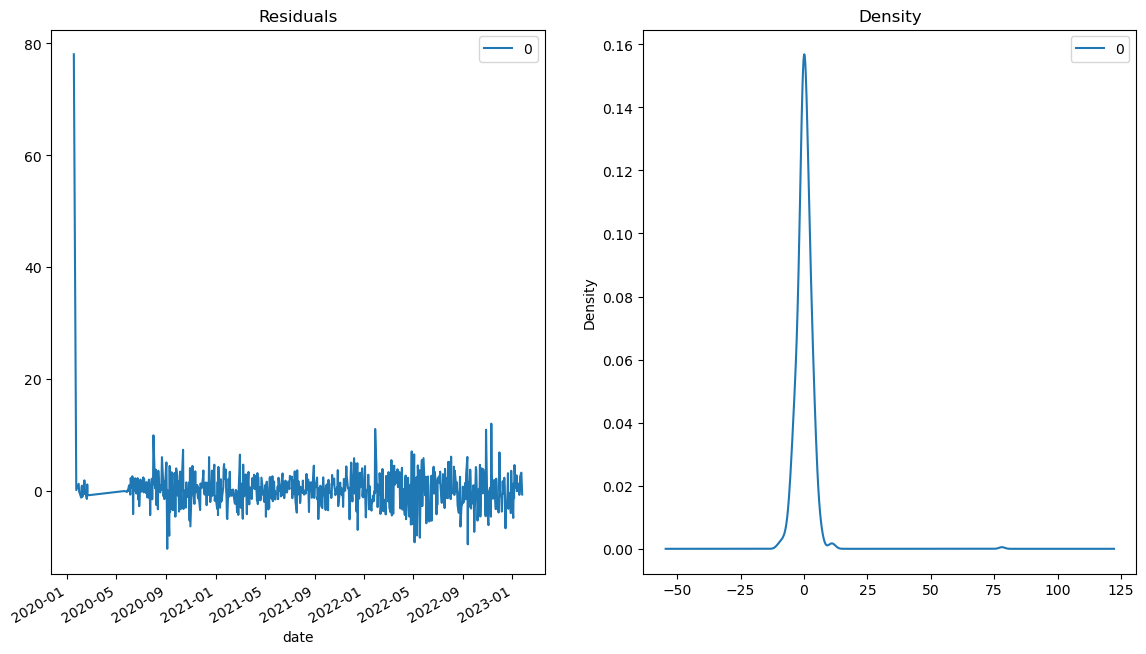

In [720]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2,figsize=(14,8))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance.

<AxesSubplot:xlabel='date'>

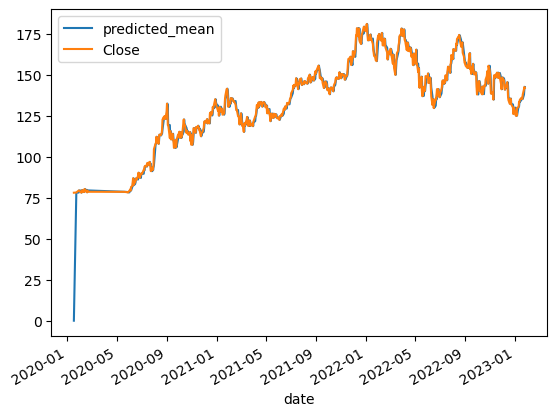

In [721]:
result.predict(dynamic=False).plot(legend=True)
df.Close.plot(legend=True)

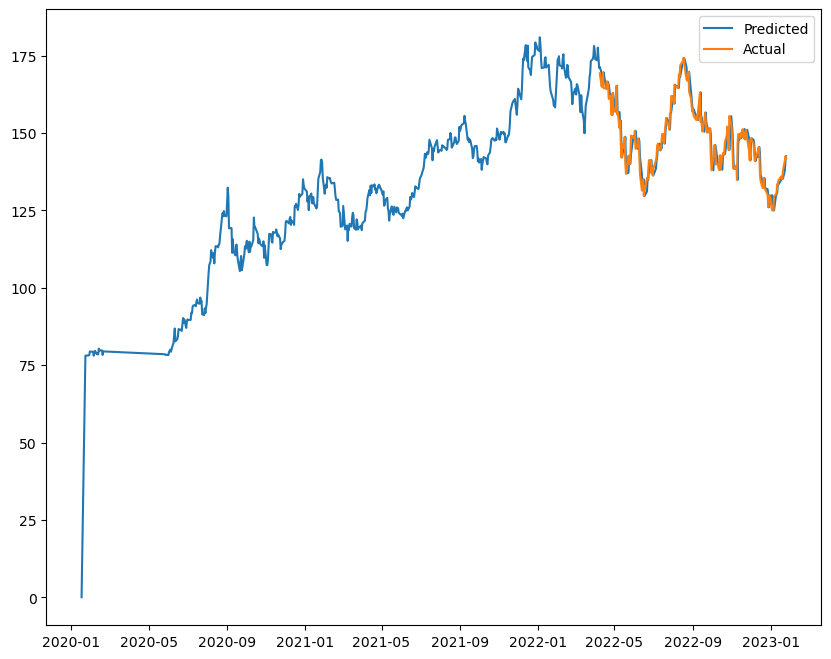

In [743]:
predicted_values = result.get_prediction(dynamic=False).predicted_mean
actual_values = test_data['Close']
plt.figure(figsize=(10,8))
plt.plot(predicted_values, label='Predicted')
plt.plot(actual_values, label='Actual')
plt.legend()
plt.show()

## Splitting the data

In [723]:
# Split the data into training and testing sets
train_data = df[:-200]
test_data = df[-200:]

In [724]:
train_data

,Close
date,
2020-01-17,78.063148
2020-01-23,78.185600
2020-01-29,79.437141
2020-01-30,79.322037
2020-02-04,78.092545
...,...
2022-04-01,173.524963
2022-04-04,177.636383
2022-04-05,174.271591


In [725]:
test_data

,Close
date,
2022-04-08,169.323990
2022-04-11,165.003525
2022-04-12,166.904938
2022-04-13,169.632584
2022-04-14,164.545593
...,...
2023-01-19,135.270004
2023-01-20,137.869995
2023-01-23,141.110001


## Predictions & Forecasting

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


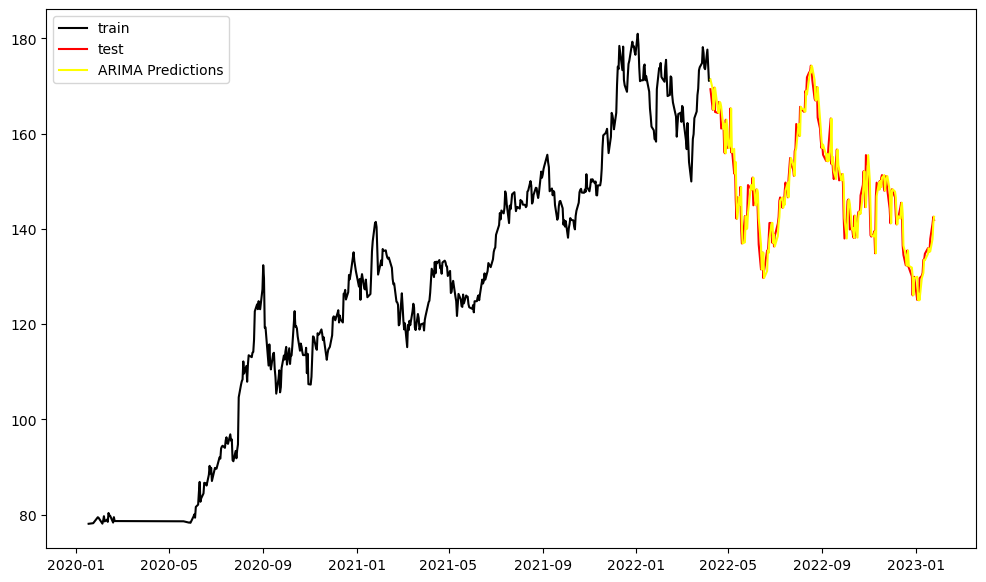

In [746]:
ARIMAmodel = ARIMA(df.Close, order = (0, 1, 0))
ARIMAmodel = ARIMAmodel.fit()


y_pred = result.predict()
conf_int = result.get_forecast().conf_int()

fc_series = pd.Series(y_pred, index=test_data.index)
lower_series = pd.Series(conf_int.iloc[:, 0], index=test_data.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test_data.index)

#y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict()
y_pred_df.index = test_data.index
y_pred_out = y_pred_df["Predictions"] 
plt.figure(figsize=(12,7))
plt.plot(train_data, color = "black", label = 'train')
plt.plot(test_data, color = "red", label = 'test')
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.legend()

plt.savefig('Arima.png')




In [727]:
fc_series

date
2022-04-08    171.364746
2022-04-11    169.323990
2022-04-12    165.003525
2022-04-13    166.904938
2022-04-14    169.632584
                 ...    
2023-01-19    135.210007
2023-01-20    135.270004
2023-01-23    137.869995
2023-01-24    141.110001
2023-01-25    142.529999
Name: predicted_mean, Length: 200, dtype: float64

In [728]:

arma_rmse = np.sqrt(mean_squared_error(test_data["Close"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  3.4267206919821502


In [729]:
MAPE = np.mean(np.abs((test_data["Close"].values - y_pred_df["Predictions"]) / test_data["Close"].values)) * 100
MAPE

1.7849206725555713

Around 1.78% MAPE implies the model is about 98.22% accurate in predicting the observations.

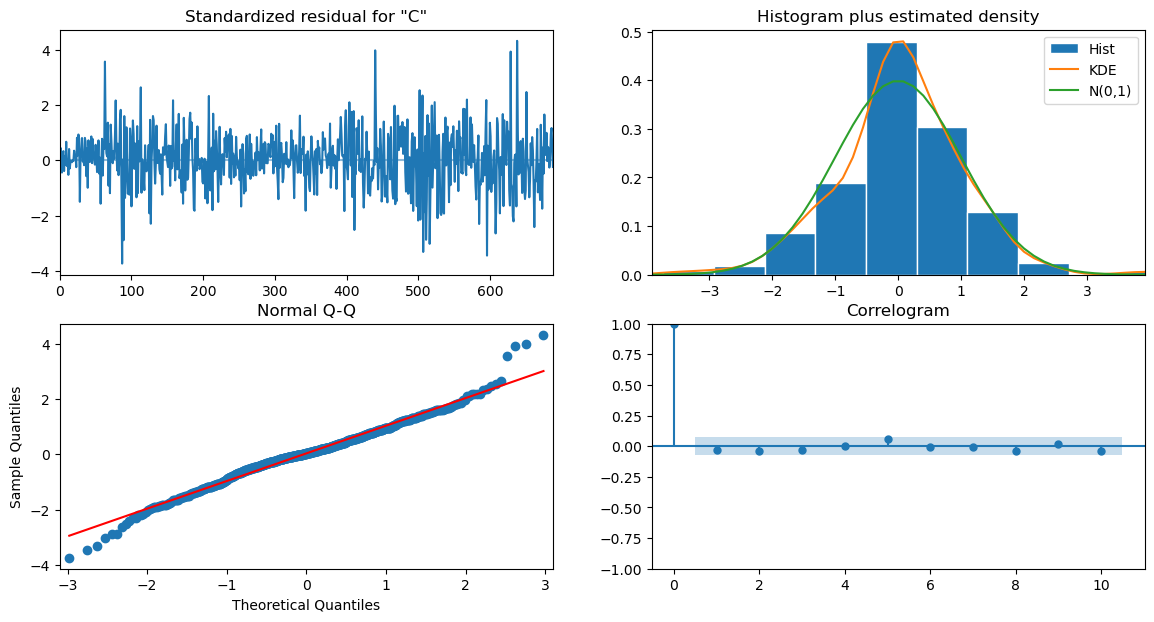

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [762]:
result.plot_diagnostics(figsize=(14,7))

plt.show()
plt.figure('residuals.png')

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model.

Overall, it seems to be a good fit. Let’s forecast.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


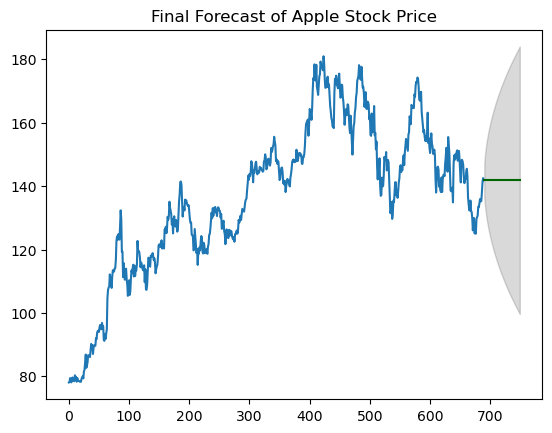

In [731]:
# Forecast
n_periods = 60

index_of_fc = np.arange(690+n_periods)

y_pred = result.predict(start=690, end=750,return_conf_int=True,dynamic=True)
conf_int = result.get_forecast(steps=60).conf_int()


fc_series = pd.Series(y_pred, index=index_of_fc)

# make series for plotting purpose

lower_series = pd.Series(conf_int.iloc[:, 0], index=index_of_fc)
upper_series = pd.Series(conf_int.iloc[:, 1], index=index_of_fc)

# Plot
plt.plot(df.values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Apple Stock Price")
plt.show()


In [732]:
start_date = '2023-01-25'
end_date = '2023-03-26'

In [733]:
date_index = pd.date_range(start=start_date,end=end_date,freq='D')
date_index.shape

(61,)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


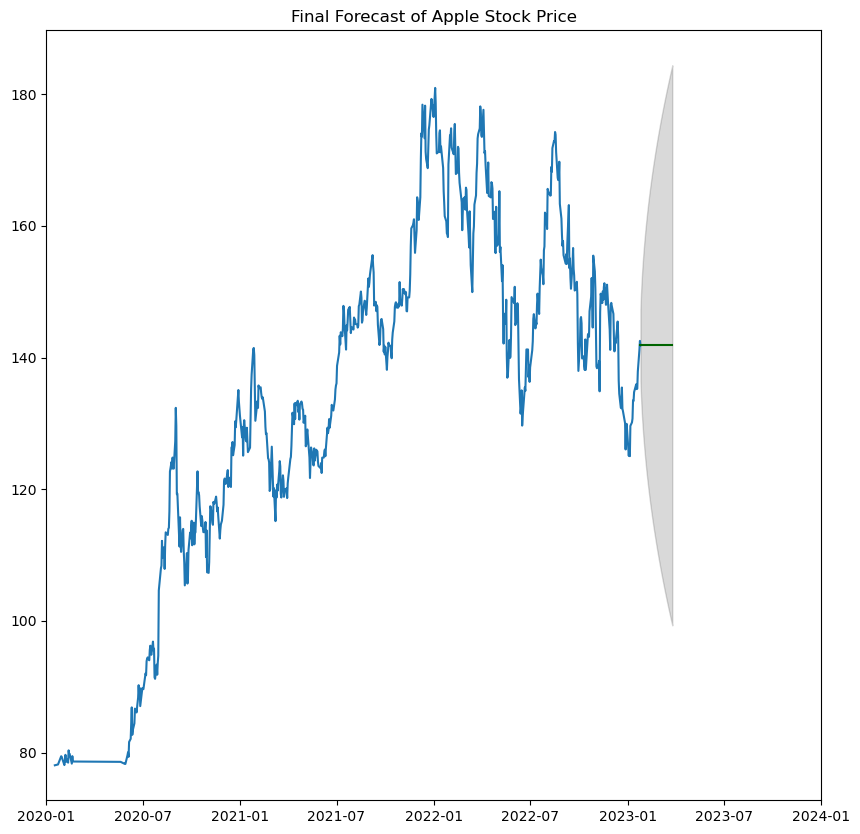

<Figure size 640x480 with 0 Axes>

In [752]:
# Forecast
n_periods = 61

index_of_fc = date_index

y_pred = result.predict(start=690, end=750,return_conf_int=True,dynamic=False)
conf_int = result.get_forecast(steps=61).conf_int()
conf_int.index=index_of_fc

fc_series = pd.Series(y_pred)
forecasted=pd.DataFrame(fc_series).set_index(index_of_fc)

# make series for plotting purpose

lower_series = pd.Series(conf_int.iloc[:, 0], index=index_of_fc)
upper_series = pd.Series(conf_int.iloc[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(10,10))
plt.xlim(pd.Timestamp('2020'), pd.Timestamp('2024'))
plt.plot(df.Close)
plt.plot(forecasted, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Apple Stock Price")

plt.show()

plt.savefig('Arima_forecasted.png')
